<a href="https://colab.research.google.com/github/lalitha-sahitya/titanic-survival-prediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/competitions/titanic')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 10.8MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [4]:
os.listdir('titanic')

['train.csv', 'gender_submission.csv', 'test.csv']

In [5]:
df=pd.read_csv('/content/titanic/train.csv')
test_df=pd.read_csv('/content/titanic/test.csv')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_num=df[['Pclass','Age','SibSp','Parch','Fare']]
df_cat=df[['Survived','Sex','Ticket','Cabin','Embarked']]

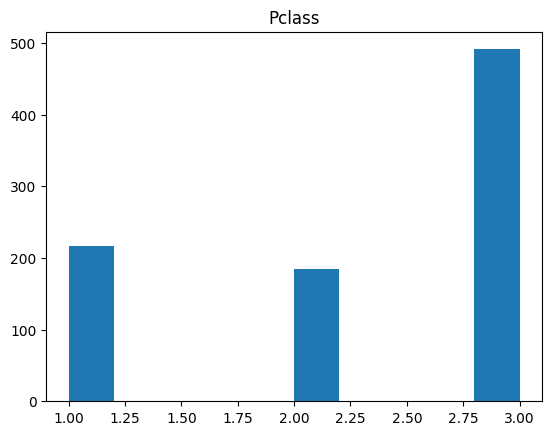

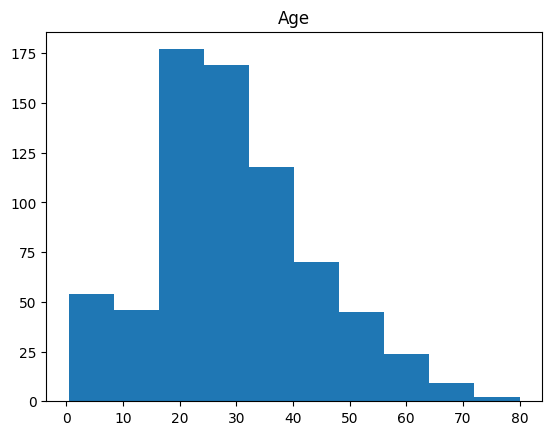

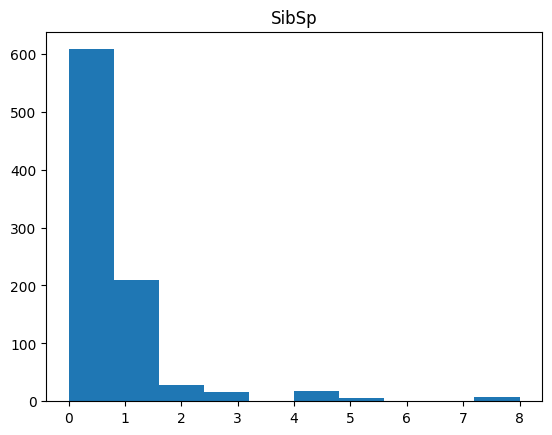

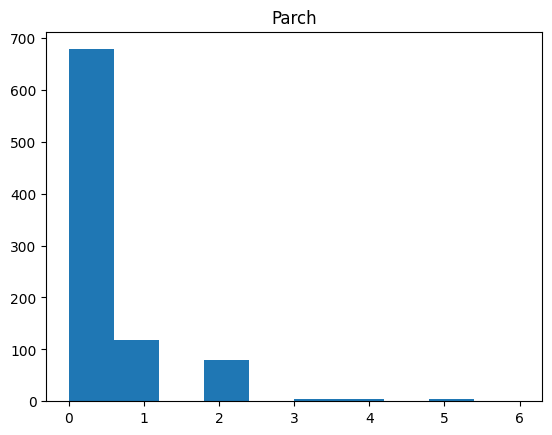

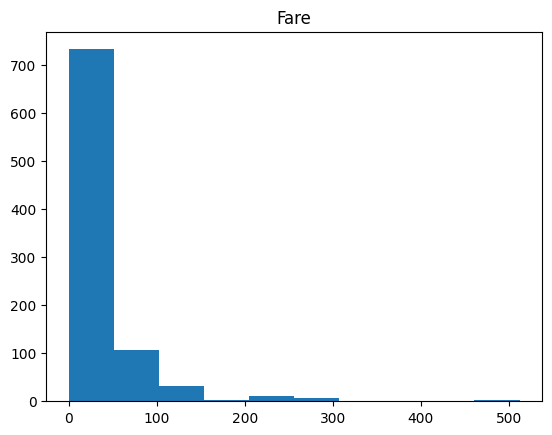

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

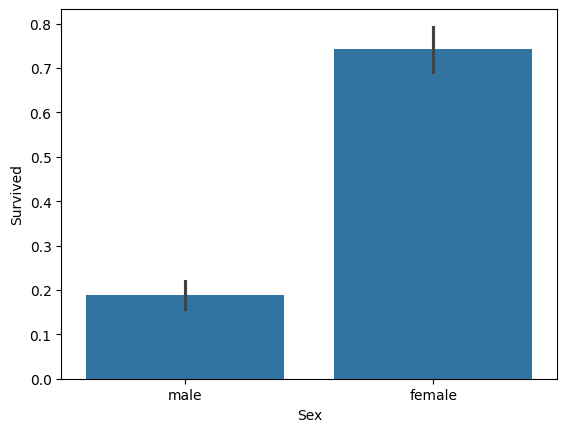

In [10]:
import seaborn as sns
sns.barplot(x='Sex',y='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

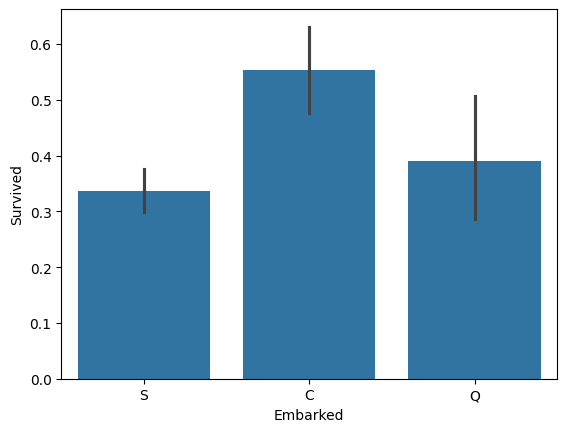

In [11]:
sns.barplot(x='Embarked',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

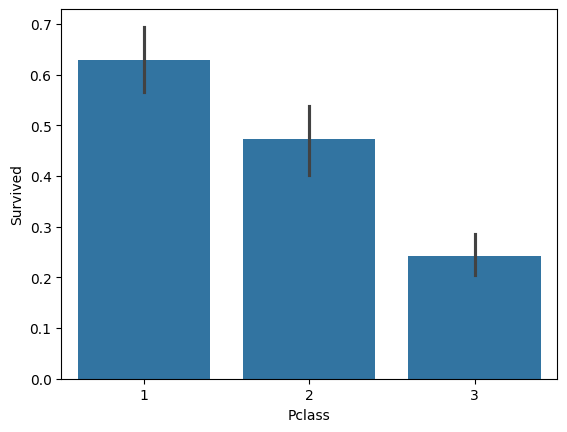

In [12]:
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Age', ylabel='Count'>

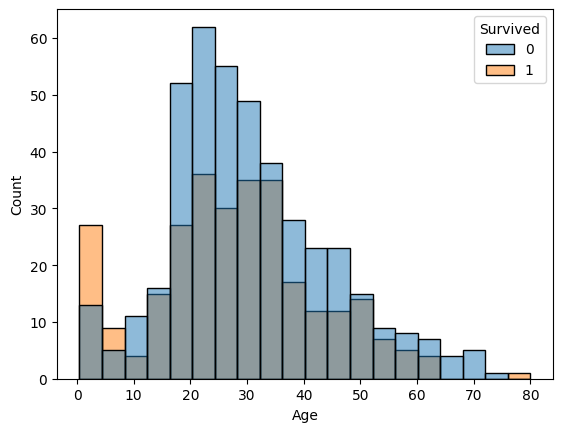

In [13]:
sns.histplot(x='Age',data=df,hue='Survived')

In [14]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
df=df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [16]:
test_df=test_df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)

In [17]:
test_df.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [18]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [20]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [21]:
df['Sex']=df.Sex.map({'male':0,'female':1}).fillna(df['Sex'].mode())

In [22]:
test_df['Sex']=test_df.Sex.map({'male':0,'female':1}).fillna(test_df['Sex'].mode())

In [23]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,NaN,0,0,8.0500,S


In [24]:
df['Embarked']=df.Embarked.map({'S':0,'C':1,'Q':2})

In [25]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]).astype(int)

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [27]:
test_df['Embarked']=test_df.Embarked.map({'S':0,'C':1,'Q':2}).fillna(test_df['Embarked'].mode()[0])
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,NaN,0,0,8.0500,0


In [28]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(df[['Age']])
df[['Age']] = imputer.transform(df[['Age']])
test_df[['Age']] = imputer.transform(test_df[['Age']])

In [29]:
df['Age']=df['Age'].astype(int)

In [30]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [31]:
test_df['Age']=test_df['Age'].astype(int)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,2
1,3,1,47,1,0,7.0000,0
2,2,0,62,0,0,9.6875,2
3,3,0,27,0,0,8.6625,0
4,3,1,22,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,28,0,0,8.0500,0
414,1,1,39,0,0,108.9000,1
415,3,0,38,0,0,7.2500,0
416,3,0,28,0,0,8.0500,0


In [32]:
test_df=test_df.fillna(test_df.Fare.mean())

In [33]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,0,45,0,0,28.5000,0
733,2,0,23,0,0,13.0000,0
382,3,0,32,0,0,7.9250,0
704,3,0,26,1,0,7.8542,0
813,3,1,6,4,2,31.2750,0
...,...,...,...,...,...,...,...
106,3,1,21,0,0,7.6500,0
270,1,0,28,0,0,31.0000,0
860,3,0,41,2,0,14.1083,0
435,1,1,14,1,2,120.0000,0


In [36]:
X_val

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,0,28,1,1,15.2458,1
439,2,0,31,0,0,10.5000,0
840,3,0,20,0,0,7.9250,0
720,2,1,6,0,1,33.0000,0
39,3,1,14,1,0,11.2417,1
...,...,...,...,...,...,...,...
433,3,0,17,0,0,7.1250,0
773,3,0,28,0,0,7.2250,1
25,3,1,38,1,5,31.3875,0
84,2,1,17,0,0,10.5000,0


In [37]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [38]:
y_val

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [39]:
df.corr()['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.106811
Parch,0.081629
SibSp,-0.035322
Age,-0.064909
Pclass,-0.338481


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
test_df=scaler.transform(test_df)

In [41]:
X_train

array([[-1.61413602, -0.7243102 ,  1.21573263, ..., -0.47934164,
        -0.07868358, -0.54803535],
       [-0.40055118, -0.7243102 , -0.47579658, ..., -0.47934164,
        -0.37714494, -0.54803535],
       [ 0.81303367, -0.7243102 ,  0.21619264, ..., -0.47934164,
        -0.47486697, -0.54803535],
       ...,
       [ 0.81303367, -0.7243102 ,  0.90818186, ..., -0.47934164,
        -0.35580399, -0.54803535],
       [-1.61413602,  1.38062393, -1.16778581, ...,  2.04874166,
         1.68320121, -0.54803535],
       [-1.61413602, -0.7243102 , -0.62957197, ...,  0.78470001,
         0.86074761, -0.54803535]])

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
train_preds=model.predict(X_train)
val_preds=model.predict(X_val)

In [43]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.8019662921348315
0.7988826815642458
0.7634854771784232
0.7714285714285715


In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=25)
dt.fit(X_train, y_train)
train_preds = dt.predict(X_train)
val_preds=dt.predict(X_val)


In [53]:
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9789325842696629
0.7988826815642458
0.996078431372549
0.7638888888888888


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=126)
rf.fit(X_train, y_train)
train_preds = rf.predict(X_train)
val_preds=rf.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9789325842696629
0.8212290502793296
0.9846743295019157
0.7916666666666666


In [57]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=1)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
val_preds=model.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.848314606741573
0.8212290502793296
0.9
0.8387096774193549


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
val_preds=model.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.8679775280898876
0.8100558659217877
0.8686440677966102
0.7941176470588235


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,random_state=42,max_depth=3)
gb.fit(X_train, y_train)

train_preds = gb.predict(X_train)
val_preds=gb.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9030898876404494
0.8212290502793296
0.9383259911894273
0.8387096774193549


In [60]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)
train_preds = ada_clf.predict(X_train)
val_preds=ada_clf.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.8370786516853933
0.8044692737430168
0.8089430894308943
0.76


In [61]:
from sklearn.ensemble import BaggingClassifier
base_estimator = DecisionTreeClassifier()
bg = BaggingClassifier(estimator=base_estimator,
                                n_estimators=100,
                                max_samples=0.5,
                                max_features=0.5,
                                bootstrap=True,
                                random_state=42)
bg.fit(X_train, y_train)
train_preds = bg.predict(X_train)
val_preds=bg.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9129213483146067
0.7932960893854749
0.9768518518518519
0.8135593220338984


In [62]:
test_df.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
test_preds=gb.predict(test_df)

In [63]:
test_preds

NameError: name 'test_preds' is not defined

In [64]:
submission_df=pd.read_csv('/content/titanic/gender_submission.csv')
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
submission_df['Survived']=test_preds

NameError: name 'test_preds' is not defined

In [ ]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_df.to_csv('submission_df.csv',index=False)

In [ ]:
from google.colab import files
files.download('submission_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>